**Analisis de criptodivisas**

Dentro de la carpeta data, disponeis de 13 ficheros con datos de criptodivisas:

 - Bitcoin (BTC)
 - Ethereum (ETH)
 - Litecoin (LTC)
 - Bitcoin Cash (BCH)
 - Ripple (XRP)
 - Monero (XMR)
 - Iota (IOTA)
    

El objetivo de la practica es usar modelos de machine learning para predecir precios de estas divisas. Debeis ir completando los modulos del notebook.

** * Prepare Data Set **

Aqui debeis cargar los imports, leer el CSV de la divisa seleccionada y mostrar las 10 primeras filas del dataset, os dejo un ejemplo con IOTA, debeis coger otra divisa que no se IOTA.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_style("whitegrid")

In [1]:


data_path='./data/'
instrument='IOTA'
data  = pd.read_csv(data_path+instrument+'.csv', names=['date','open','high','low','close','volume','market cap'], skiprows=1,index_col=0, parse_dates=True)
data.head(10)

,open,high,low,close,volume,market cap
date,,,,,,
2017-06-13,0.638503,0.652862,0.533910,0.590255,25425600,1774740000
2017-06-14,0.592347,0.606196,0.495745,0.528916,14194900,1646450000
2017-06-15,0.528284,0.543165,0.300365,0.363661,10300400,1468380000
2017-06-16,0.353285,0.448249,0.309852,0.410757,6920690,981966000
2017-06-17,0.426762,0.444205,0.414139,0.419906,3100660,1186200000
2017-06-18,0.420597,0.426069,0.393790,0.405862,2514450,1169060000
2017-06-19,0.405456,0.420990,0.388231,0.412183,3543640,1126980000
2017-06-20,0.414299,0.422032,0.398649,0.418494,3755470,1151560000
2017-06-21,0.419439,0.437340,0.405037,0.413547,3999810,1165840000


* Crea una lista con todas las criptodivisas de la carpeta "data" y muestra el numero de filas de cada dataset

* muestra el volumen de datos y tipos del dataset.usa info()

* Chequea missing values: isnull(), notnull(). Recordad la ayuda es ?pd.isnull() para ver como funciona una función

* chequea valores duplicados. duplicated()

* chequea market capitalization y volume para la divisa que quieras

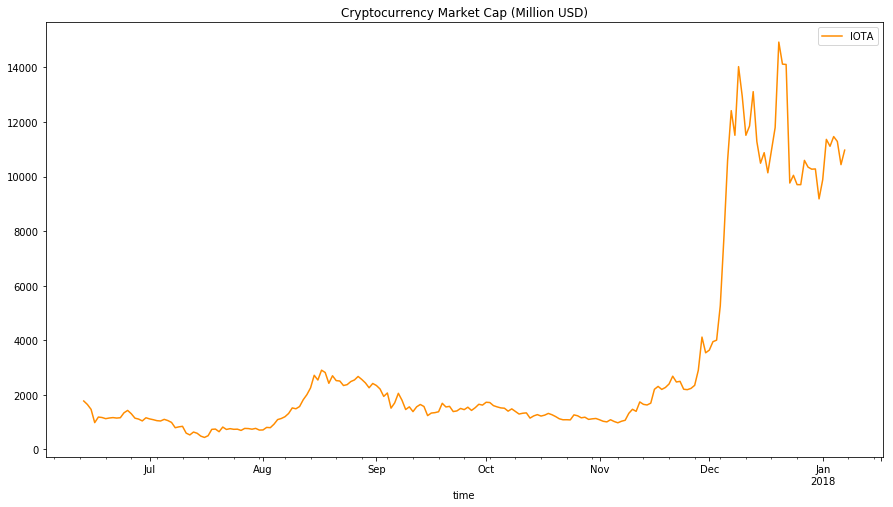

In [10]:
plt.figure(figsize=(15,8))
(data['market cap']/1000000).plot(color='darkorange', label='IOTA')
plt.legend()
plt.xlabel('time')
plt.title('Cryptocurrency Market Cap (Million USD)')
plt.show()

In [11]:
# ahora el volumen aqui


In [12]:
#plotea solo el año 2017 que es donde realmente hubo un gran crecimiento
data_m = data['2017-12-01':'2017-12-31']

In [ ]:
#Define una feature o atributo que sea la diferencia entre opening y closing price

#Dibujalo

In [17]:
#Calculemos ahora una moving average (MA) de 5 dias, MA es un indicador que nos ayuda as suavizar la variacion
#del precio price, es un indicador que sigue la tendencia al basarse en precios hisotricos. Usemos rolling(window=X)


#Dibujalo

In [18]:
# calcula daily average price como (open + high + low + close) / 4

#dibujalo

In [19]:
# lee el precio close de cada divisa y concatenalas para tener dataframe global de los precios close de todas las divisas
# algunos tips
#iota = data[['close']]
#ltc= data1[['close']]
#............
#close = pd.concat([iota,ltc,...], axis=1)

In [ ]:
#chequea earson correlation coefficient para ver la influencia del precio del bitcoin en el resto de divisas
#tips: 
#usa seaborn->import seaborn as sns; sns.set_style("whitegrid")
#sns.heatmap(close.corr(),cmap='coolwarm')

#que observas en el grafico

In [ ]:
#define una variable que sea el precio de la divisa en 7 dias, es decir queremos predecir el precio de la siguiente semana.
#usa diferentes algoritmos de machine learning para regresion
#calcula mean_absolute_error y mean_squared_error

In [29]:
#uso la practica para enseñaros plotly, asi podeis ver graficos interactivos usando vuestra divisa


#pip install plotly----->Teneis que tener instalado plotly y se hace asi-->https://plot.ly/~jackp/17421.embed
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import numpy as np

increasing_color = '#17BECF'
decreasing_color = '#7F7F7F'
data_plotly = []
layout = {
    'xaxis': {
        'rangeselector': {
            'visible': True
        }
    },
    # Adding a volume bar chart for candlesticks is a good practice usually
    'yaxis': {
        'domain': [0, 0.2],
        'showticklabels': False
    },
    'yaxis2': {
        'domain': [0.2, 0.8]
    },
    'legend': {
        'orientation': 'h',
        'y': 0.9,
        'yanchor': 'bottom'
    },
    'margin': {
        't': 40,
        'b': 40,
        'r': 40,
        'l': 40
    }
}

# Defining main chart
trace0 = go.Candlestick(
    x=data.index, open=data['open'], high=data['high'],
    low=data['low'], close=data['close'],
    yaxis='y2', name='iota',
    increasing=dict(line=dict(color=increasing_color)),
    decreasing=dict(line=dict(color=decreasing_color)),
)

data_plotly.append(trace0)

# Adding some range buttons to interact
rangeselector = {
    'visible': True,
    'x': 0,
    'y': 0.8,
    'buttons': [
        {'count': 1, 'label': 'reset', 'step': 'all'},
        {'count': 6, 'label': '6 mo', 'step': 'month', 'stepmode': 'backward'},
        {'count': 3, 'label': '3 mo', 'step': 'month', 'stepmode': 'backward'},
        {'count': 1, 'label': '1 mo', 'step': 'month', 'stepmode': 'backward'},
    ]
}

layout['xaxis'].update(rangeselector=rangeselector)

# Setting volume bar chart colors
colors = []
for i, _ in enumerate(data.index):
    if i != 0:
        if data['close'].iloc[i] > data['close'].iloc[i-1]:
            colors.append(increasing_color)
        else:
            colors.append(decreasing_color)
    else:
        colors.append(decreasing_color)

trace1 = go.Bar(
    x=data.index, y=data['volume'],
    marker=dict(color=colors),
    yaxis='y', name='Volume'
)

data_plotly.append(trace1)

# Adding Moving Average
def moving_average(interval, window_size=10):
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(interval, window, 'same')

trace2 = go.Scatter(
    x=data.index[5:-5], y=moving_average(data['close'])[5:-5],
    yaxis='y2', name='Moving Average',
    line=dict(width=1)
)

data_plotly.append(trace2)

# Adding boilinger bands
def bollinger_bands(price, window_size=10, num_of_std=5):
    rolling_mean = price.rolling(10).mean()
    rolling_std = price.rolling(10).std()
    upper_band = rolling_mean + (rolling_std * 5)
    lower_band = rolling_mean - (rolling_std * 5)
    return upper_band, lower_band

bb_upper, bb_lower = bollinger_bands(data['close'])

trace3 = go.Scatter(
    x=data.index, y=bb_upper,
    yaxis='y2', line=dict(width=1),
    marker=dict(color='#ccc'), hoverinfo='none',
    name='Bollinger Bands',
    legendgroup='Bollinger Bands'
)
data_plotly.append(trace3)

trace4 = go.Scatter(
    x=data.index, y=bb_lower,
    yaxis='y2', line=dict(width=1),
    marker=dict(color='#ccc'), hoverinfo='none',
    name='Bollinger Bands', showlegend=False,
    legendgroup='Bollinger Bands'
)
data_plotly.append(trace4)
fig = go.Figure(data=data_plotly, layout=layout)
py.iplot(fig, filename='iota-candlestick')